**QUESTION 3 - SIR Model**

**Tahir Manuel D Mello  
BIS634 Assignment 3**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plotnine import ggplot, aes, geom_tile, labs, scale_fill_gradientn, theme_void, geom_text, theme,\
                     element_blank, element_rect, scale_x_discrete, scale_y_discrete, scale_x_continuous, scale_y_continuous
import plotnine

In [2]:
N = 134000
I0 = 1
R0 = 0
S0 = N - I0 - R0
beta = 2
gamma = 1
delta_t = 0.1 #days
tmax = 1000 #days

Provide your own implementation for Explicit Euler method to plot i(t). **(5 points)**

In [3]:
def deriv(N, I, R, S, beta, gamma):
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dIdt, dRdt, dSdt

In [4]:
def i_plot(N, I0, R0, S0, beta, gamma, delta_t, tmax, printf, plot):
    
    I_set = []
    R_set = []
    S_set = []
    
    I_set.append(I0)
    R_set.append(R0)
    S_set.append(S0)
    
    I_previous, R_previous, S_previous = I0, R0, S0
    
    Idot_previous, Rdot_previous, Sdot_previous = deriv(N, I_previous, R_previous, S_previous, beta, gamma)
    
    for i in range(tmax):
        I_next = I_previous + Idot_previous*delta_t
        R_next = R_previous + Rdot_previous*delta_t
        S_next = S_previous + Sdot_previous*delta_t
        
        I_set.append(I_next)
        R_set.append(R_next)
        S_set.append(S_next)
        
        I_previous, R_previous, S_previous = I_next, R_next, S_next
        
        Idot_previous, Rdot_previous, Sdot_previous = deriv(N, I_previous, R_previous, S_previous, beta, gamma)
        
        if I_next < 1:
            break
    
    peak = round(max(I_set))
    
    peakday = round(np.argmax(np.array(I_set))*delta_t)
        
    timescale = np.arange(0,len(I_set), 1)
    
    if printf == True:
        print("The peak number of infected people was " + str(peak) + "." )
        print("The peak number of infected people happened on Day " + str(peakday) + "." )
        
    if plot == True:    
        plt.figure(figsize=(15, 12))
        plt.plot(timescale, I_set)

        plt.title('Infected People vs Time - i(t) vs t')
        plt.ylabel('Infected People')
        plt.xlabel('TIme (days)')

        plt.xticks(np.arange(0,len(I_set), 10), np.arange(0, len(I_set)*delta_t, 1))
    
    return I_set, peak, peakday 

For the New Haven case, plot the time course of the number of infected individuals until that number drops below 1 (at which point, we'll assume the disease has run its course). **(5 points)**

The peak number of infected people was 21050.
The peak number of infected people happened on Day 12.


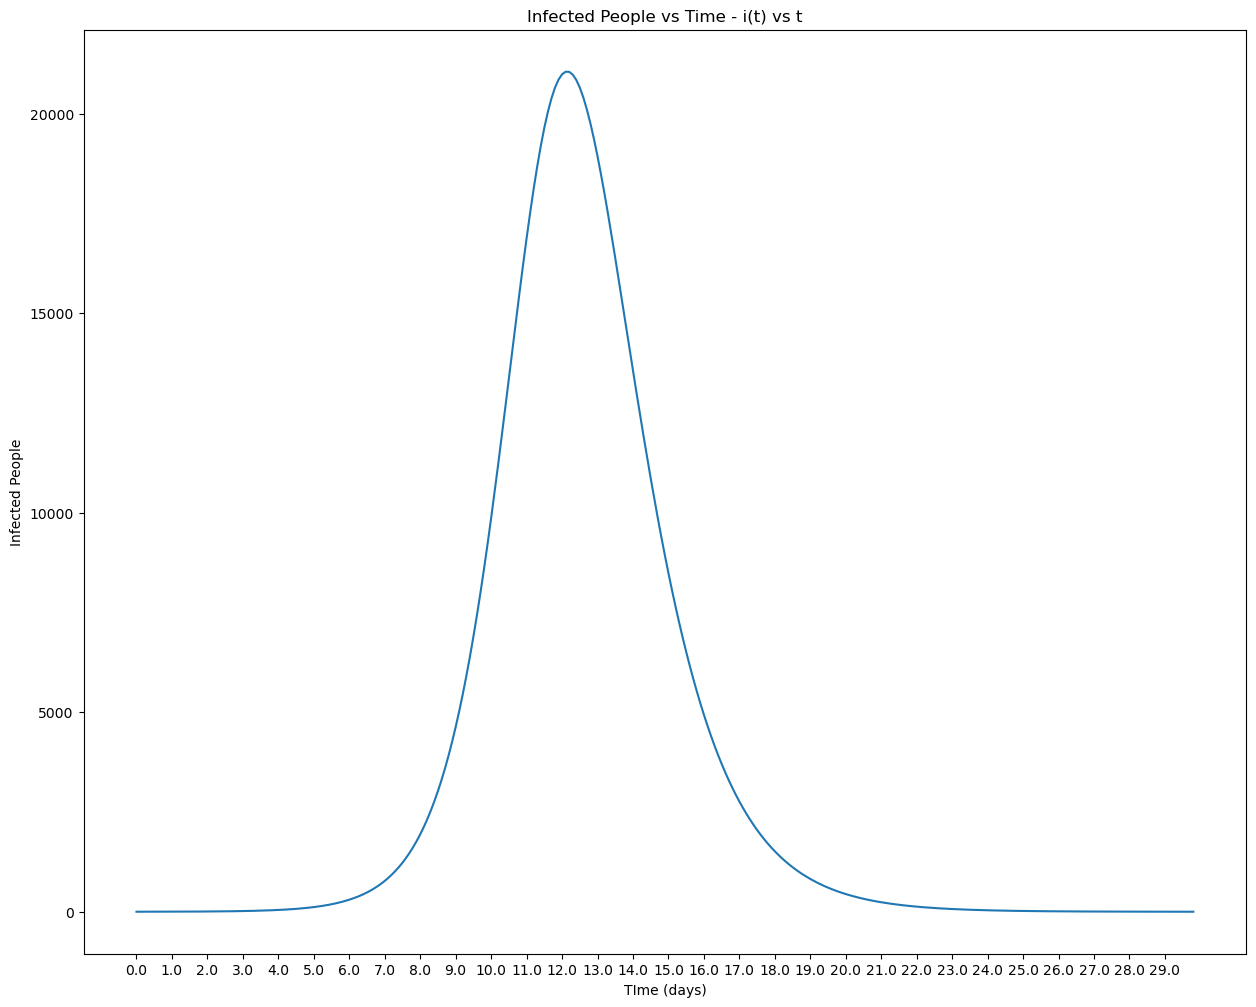

In [5]:
I_set_out, max_i, may_day = i_plot(N, I0, R0, S0, beta, gamma, delta_t, tmax, True, True)

For those parameter values, when does the number of infected people peak? **(2 points)**   
How many people are infected at the peak? **(3 points)**

In [6]:
I_set_out, max_i, max_day = i_plot(N, I0, R0, S0, beta, gamma, delta_t, tmax, True, False)

The peak number of infected people was 21050.
The peak number of infected people happened on Day 12.


Plot on a heat map how the time of the peak of the infection depends on gamma and beta. **(5 points)**

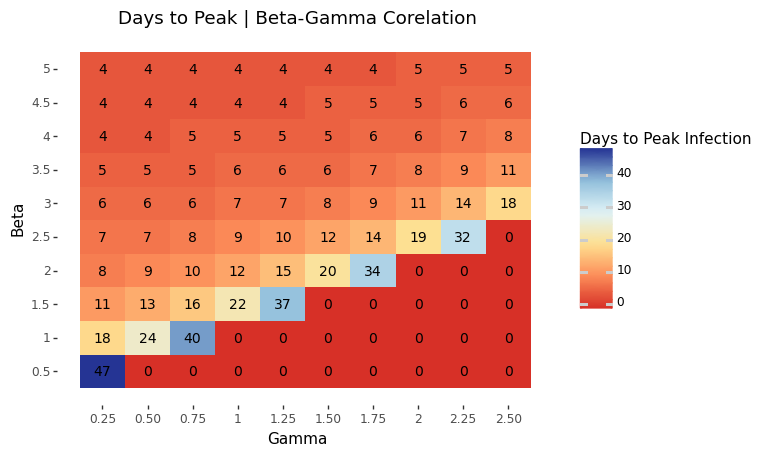

<ggplot: (122574107115)>

In [7]:
gamma_set = np.arange(0.25,2.6, 0.25)
beta_set = np.arange(0.5,5.5,0.5)
data_out = []

for gamma in gamma_set:
    for beta in beta_set:
        I_set_out, max_i, max_day = i_plot(N, I0, R0, S0, beta, gamma, delta_t, tmax, False, False)
        temp = [None]*3
        temp[0] = gamma
        temp[1] = beta
        temp[2] = max_day
        
        data_out.append(temp)
        
data_out = pd.DataFrame(data_out)
data_out.columns = ['Gamma', 'Beta', 'Days to Peak Infection']

color_palette = "#d73027,#fc8d59,#fee090,#e0f3f8,#91bfdb,#253494"
color_palette_list = color_palette.split(",")

ggplot(mapping = aes(x = 'Gamma', y = 'Beta'), data = data_out) + \
    geom_tile(aes(fill = 'Days to Peak Infection')) +\
    geom_text(aes(label='Days to Peak Infection'), size=10) +\
    scale_fill_gradientn(colors=color_palette_list) +\
    labs(title = "Days to Peak | Beta-Gamma Corelation", x = "Gamma", y = "Beta")+\
    scale_x_continuous(breaks = gamma_set) +\
    scale_y_continuous(breaks = beta_set) +\
    theme(panel_background=element_rect(fill='white') )

Plot on a heat map how the number of individuals infected at peak depends on gamma and beta. **(5 points)**

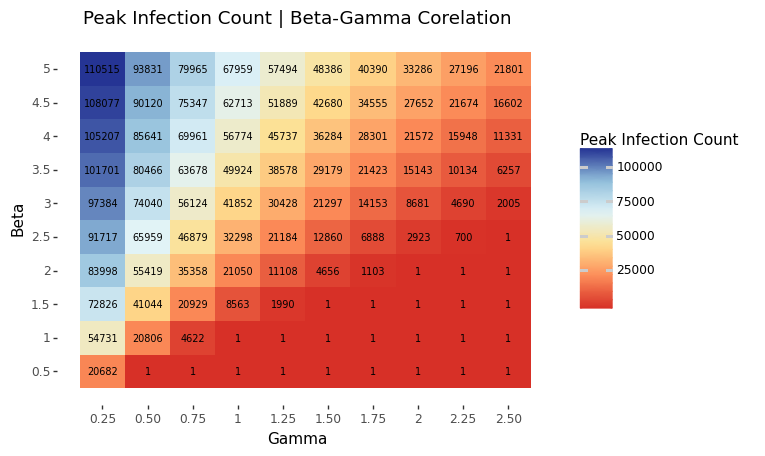

<ggplot: (122574258664)>

In [8]:
gamma_set = np.arange(0.25,2.6, 0.25)
beta_set = np.arange(0.5,5.5,0.5)
data_out = []

for gamma in gamma_set:
    for beta in beta_set:
        I_set_out, max_i, max_day = i_plot(N, I0, R0, S0, beta, gamma, delta_t, tmax, False, False)
        temp = [None]*3
        temp[0] = gamma
        temp[1] = beta
        temp[2] = max_i
        
        data_out.append(temp)
        
data_out = pd.DataFrame(data_out)
data_out.columns = ['Gamma', 'Beta', 'Peak Infection Count']

color_palette = "#d73027,#fc8d59,#fee090,#e0f3f8,#91bfdb,#253494"
color_palette_list = color_palette.split(",")

ggplot(mapping = aes(x = 'Gamma', y = 'Beta'), data = data_out) + \
    geom_tile(aes(fill = 'Peak Infection Count')) +\
    geom_text(aes(label='Peak Infection Count'), size=7) +\
    scale_fill_gradientn(colors=color_palette_list) +\
    labs(title = "Peak Infection Count | Beta-Gamma Corelation", x = "Gamma", y = "Beta")+\
    scale_x_continuous(breaks = gamma_set) +\
    scale_y_continuous(breaks = beta_set) +\
    theme(panel_background=element_rect(fill='white') )